# Машинное обучение, DS-поток
## Задание ML.5


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 10 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 90 баллов.

In [1]:
# Bot check

# HW_ID: ds_ml5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from tqdm import tqdm
import datetime
import warnings
warnings.filterwarnings("ignore")

---
## Теория

Рассмотрим задачу бинарной классификации, причем $\mathscr{Y} = \{+1, -1\}$. Пусть так же $\widehat{y}$ &mdash; некоторый классификатор, предсказывающий <u><i>степень принадлежности</i></u> классу. При этом решающее правило имеет вид 
 $f(x) = \text{sign}\left(\widehat{y}(x)\right)$.
В задачах 1-4 рассматриваем логистическую функцию потерь: $\mathcal{L}(y, z) = \log \big(1 + \exp(-yz) \big).$

### Задача 1

Покажите, что задача минимизации по функциям $y(x)$ функционала ошибки $Q(y) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, y(x_i)\right) \longrightarrow \min_{y(x)}$ для логистической функции потерь эквивалентна максимизации по $y(x)$ функции правдоподобия в предположении $Y_i \sim Bern(\sigma(y(x_i)))$, где $Y_i \in \{-1, +1 \}$.

*Решение прикрепил отдельным файлом (ML5.pdf)*

### Задача 2

Рассмотрим градиентный бустинг с логистической функцией потерь. Выпишите для градиентного спуска формулу для вектора сдвигов предсказаний и задачу поиска новой базовой модели по их приближению. 

*Решение прикрепил отдельным файлом (ML5.pdf)*

### Задача 3

Предположим, модель градиентного бустинга $\widehat{y}_{t - 1}$ уже построена.
1. Выпишите вид функционала ошибки $Q(\widehat{y}_t) = \sum\limits_{i = 1}^n \mathcal{L}\left(Y_i, \widehat{y}_t(x_i)\right)$ для логистической функции потерь. Одинаковый ли вклад вносят разные объекты в ошибку при построении новой базовой модели $b_t$?
2. Посмотрите на формулу для вектора сдвигов, полученную в предыдущей задаче. Как она выражается через отклики на объектах обучающей выборки? Одинаковый ли вклад вносят разные объекты в формирование вектора сдвигов при построении новой базовой модели $b_t$?
3.  На лекции было показано, что для экспоненциальной функции есть проблема: базовый классификатор может настраиваться только на шумовые объекты. Наблюдается ли такая проблема у логистической функции потерь? Как она ведет себя на объектах с сильно отрицательным, околонулевым, сильно положительным отсупами?

### Задача 4


Рассмотрим градиентный бустинг над решающими деревьями с логистической функции потерь. После построения дерева будем делать перенастройку в листьях дерева.
1. Выпишите оптимизационную задачу для коэффициентов $\gamma_{tj}$ &mdash; новых ответов в листьях.
2. Решите полученную задачу сделав один шаг метода Ньютона из начального приближения $\gamma_{tj} = 0$, что соответствует отсутствию базовой модели $b_t$.

---
## Практика

### Задача 5

**Внимание!** 

Перед выполнением задачи прочитайте полностью условие. В задаче используются смеси различных моделей с разными гиперпараметрами. Подумайте над тем, какой гиперпараметр как подбирать и на каком множестве. Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

**Не забывайте делать выводы в каждом пункте!**

**1.**

Повторите исследование, проведенное в задаче 2 задания ML.4, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом. 

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 1 до 15];
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по-умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.

*Замечания.*
* В качестве основы можно использовать как свое решение задания ML.4, так и выложенное на [сайте](https://thetahat.ru). В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t$.
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество итераций на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.

In [3]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.25, random_state=42)

100%|██████████| 20/20 [06:27<00:00, 19.40s/it]


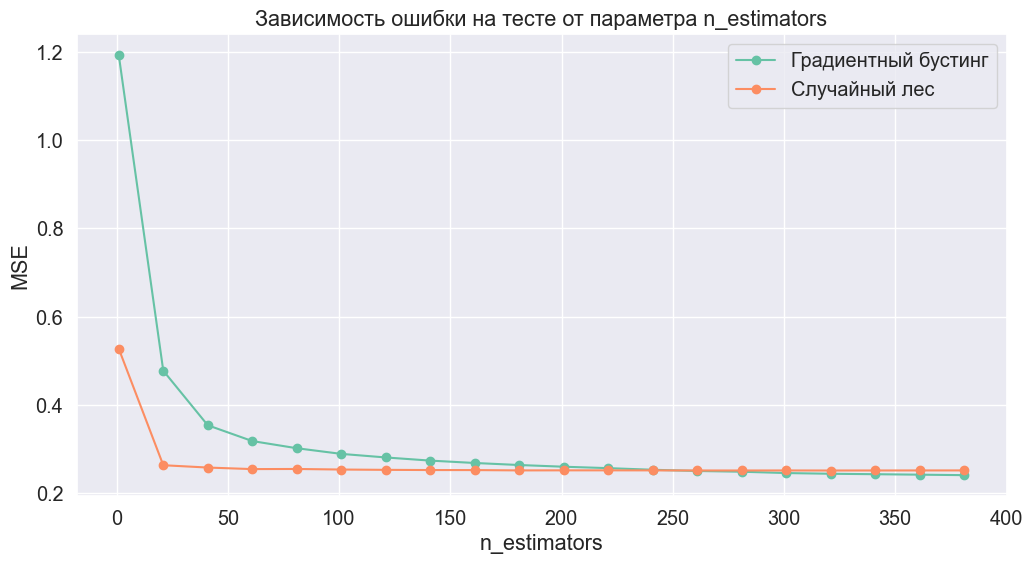

100%|██████████| 15/15 [01:17<00:00,  5.18s/it]


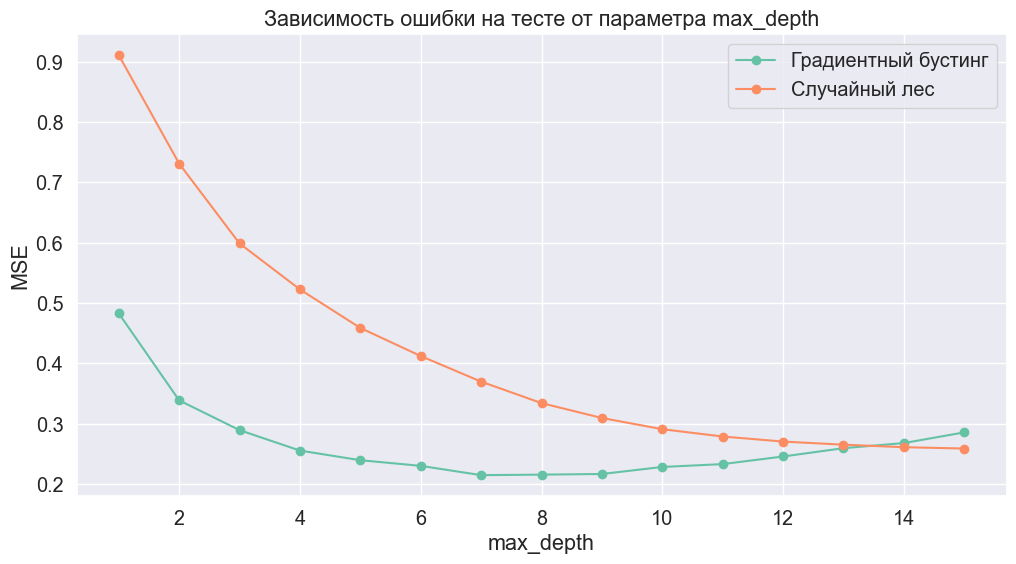

100%|██████████| 10/10 [00:31<00:00,  3.10s/it]


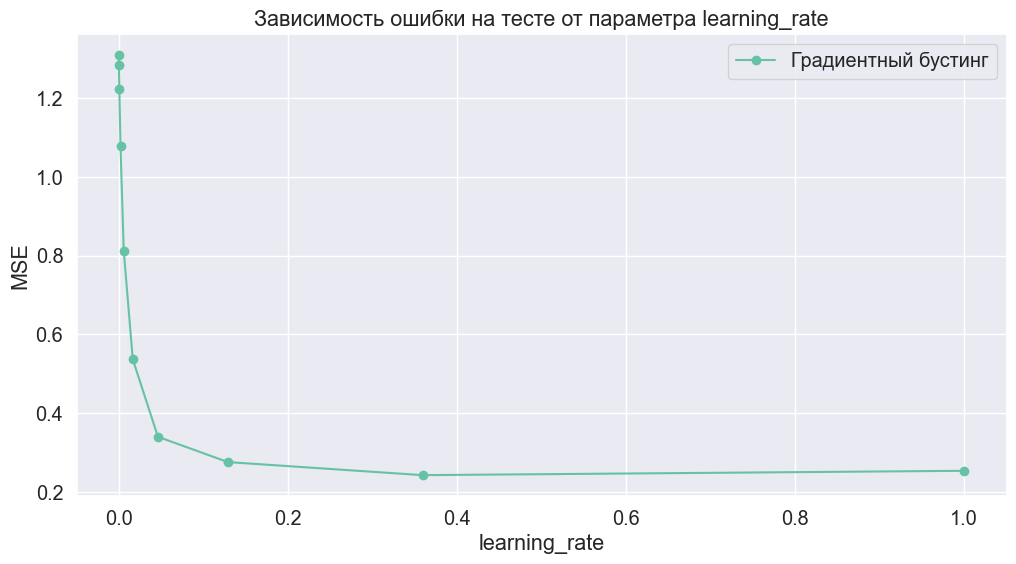

In [4]:
for key, rng in zip(['n_estimators','max_depth','learning_rate'], [range(1,401,20),range(1,16),np.logspace(-4,0,10).round(5)]):  # задаем параметры и диапазоны
    plt.figure(figsize=(12,6))
    for Model, label in zip([GradientBoostingRegressor,RandomForestRegressor], ['Градиентный бустинг','Случайный лес']):  # и обучаем обе модели
        if key=='learning_rate' and label=='Случайный лес':  # у случайного леса нет параметра learning_rate
            continue
        err = []
        for val in tqdm(rng):  # при каждом значении параметра из диапазона
            model = Model(random_state=42, **{key:val}).fit(X_train, y_train)  # обучаем модель с желаемым значением параметра
            err.append(MSE(y_test, model.predict(X_test)))
        plt.plot(rng, err, label=label, marker='o')
    plt.title(f'Зависимость ошибки на тесте от параметра {key}')
    plt.xlabel(key)
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

*Смысл гиперпараметров:*  
*n_estimators - кол-во деревьев в цепочке бустинга*  
*max_depth - максимальная глубина деревьев из цепочки*  
*learning_rate - размер вклада каждого дерева*  
  
*Выводы:*  
*По построенным графикам видно, что:*  
*1) с ростом числа деревьев ошибка падает. Причем у случайного леса ошибка начинает падать быстрее, и после n_estimators=20 почти стабилизируется. Но в итоге при n_estimators>350 градиентный бустинг опережает лес по качеству*  
*2) у градиентного бустинга график ошибки имеет минимум при max_depth около 7-9, а у леса ошибка монотонно убывает на исследуемом диапазоне значений параметра. При этом при max_depth<13 бустинг заметно опережает лес по качеству*  
*2) с ростом learning_rate ошибка у градиентного бустинга убывает, но довольно быстро выходит на плато*  

In [5]:
for _ in range(3):
    model = GradientBoostingRegressor().fit(X_train, y_train)
    print(round(MSE(y_test, model.predict(X_test)), 4), end=', ')

0.2897, 0.2897, 0.2895, 

*Если не фиксировать random_state, то ошибка немного меняется от запуска к запуску. Это связано с тем, что деревья в составе бустинга строятся немного по-разному. Первое дерево обучается на случайной подматрице из матрицы признаков, т.е. на случайных признаках и на случайных примерах из выборки, плюс признаки случайно перетасовываются. Остальные деревья учатся предсказывать новые ошибки (от нового первого дерева), а значит, тоже немного меняются* 

In [6]:
gridsearch = GridSearchCV(  # найдем оптимальные гиперпараметры
    estimator = GradientBoostingRegressor(random_state=42),
    param_grid = {
        'n_estimators': np.arange(1,101,5),
        'max_depth': np.arange(1,16),  # работало слишком долго, немного сузил перебор, чтобы успеть
    },
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42),
    scoring = 'neg_mean_squared_error'
)
gridsearch.fit(X_train, y_train)

print("Лучшие гиперпараметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v}')
max_depth, n_estimators = [gridsearch.best_params_[p] for p in ['max_depth', 'n_estimators']]  # фиксируем

Лучшие гиперпараметры:
max_depth: 8
n_estimators: 96


In [48]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=n_estimators, max_depth=max_depth).fit(X_train, y_train)
print(f'MSE на тесте: {MSE(y_test, gb.predict(X_test)):.2f}')

MSE на тесте: 0.22


100%|██████████| 8/8 [00:35<00:00,  4.38s/it]


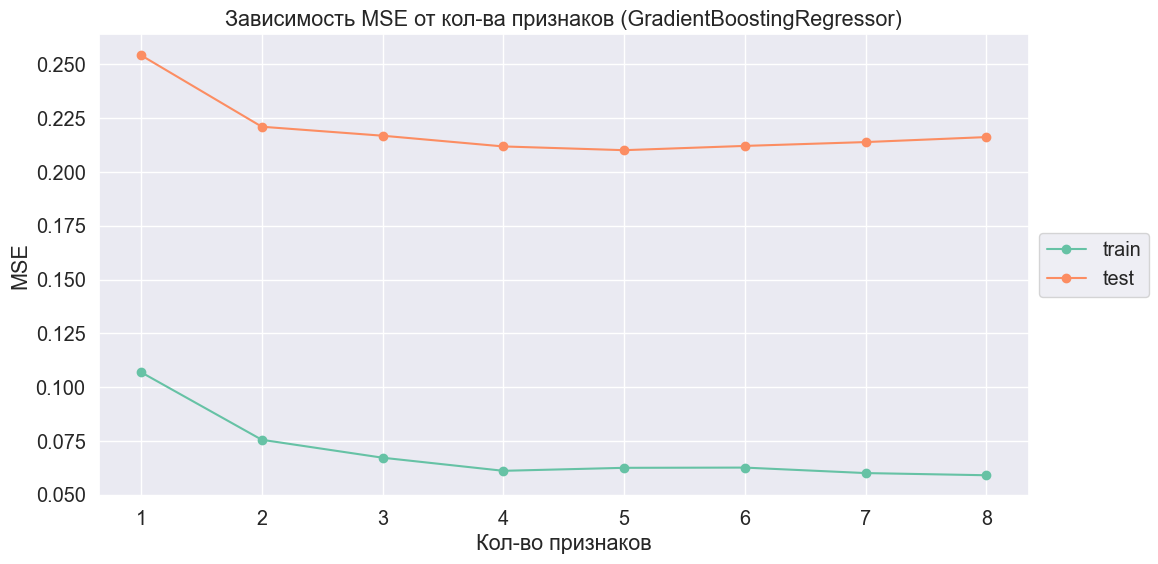

In [16]:
test_mses, train_mses = [], []
for max_features in tqdm(np.arange(1,9)):
    model = GradientBoostingRegressor(max_features=max_features, max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    test_mses.append(MSE(y_test, model.predict(X_test)))
    train_mses.append(MSE(y_train, model.predict(X_train)))

plt.figure(figsize=(12,6))
plt.plot(np.arange(1,9), train_mses, label='train', marker='o')
plt.plot(np.arange(1,9), test_mses, label='test', marker='o')
plt.title('Зависимость MSE от кол-ва признаков (GradientBoostingRegressor)')
plt.xlabel('Кол-во признаков')
plt.ylabel('MSE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

*Видно, что при малом кол-ве признаков (1-2) ошибка велика, оптимальное кол-во - около 5, а при большем возникает небольшое переобучение (лосс на трейне падает, а на тесте - растет). Это можно объяснить тем, что признаки начинают коррелировать*

**2.**

Проведите сравнение случайного леса и градиентного бустинга с оптимальными гиперпараметрами, подобранными ранее, по производительности, в рамках которого выполните следующие действия.
* Замерьте время обучения данных моделей.
* Замерьте время построения предсказания для каждого объекта тестовой выборки. Постройте гистограмму, посчитайте среднее время и предсказательный интервал (возьмите выборочные квантили).
* Сравните фактическую глубину деревьев и количество листьев в композициях с помощью гистограмм. Посчитайте также среднее значение указанных характеристик. Используйте методы `get_depth()` и `get_n_leaves()` у решающего дерева.

In [8]:
gb = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
rf = RandomForestRegressor(max_depth=23, n_estimators=94, random_state=42)  # лес возьмем с оптимальными параметрами, полученными в дз ML4

for model, name in zip([gb,rf], ['град. бустинга','случ. леса']):
    start = datetime.datetime.now()
    for _ in range(10):
        model.fit(X_train, y_train)
    stop = datetime.datetime.now()
    print(f'Время обучения {name}: {(stop-start).seconds/10:.2f} сек')

Время обучения град. бустинга: 7.00 сек
Время обучения случ. леса: 9.20 сек


*В среднем, случайный лес обучается чуть дольше*

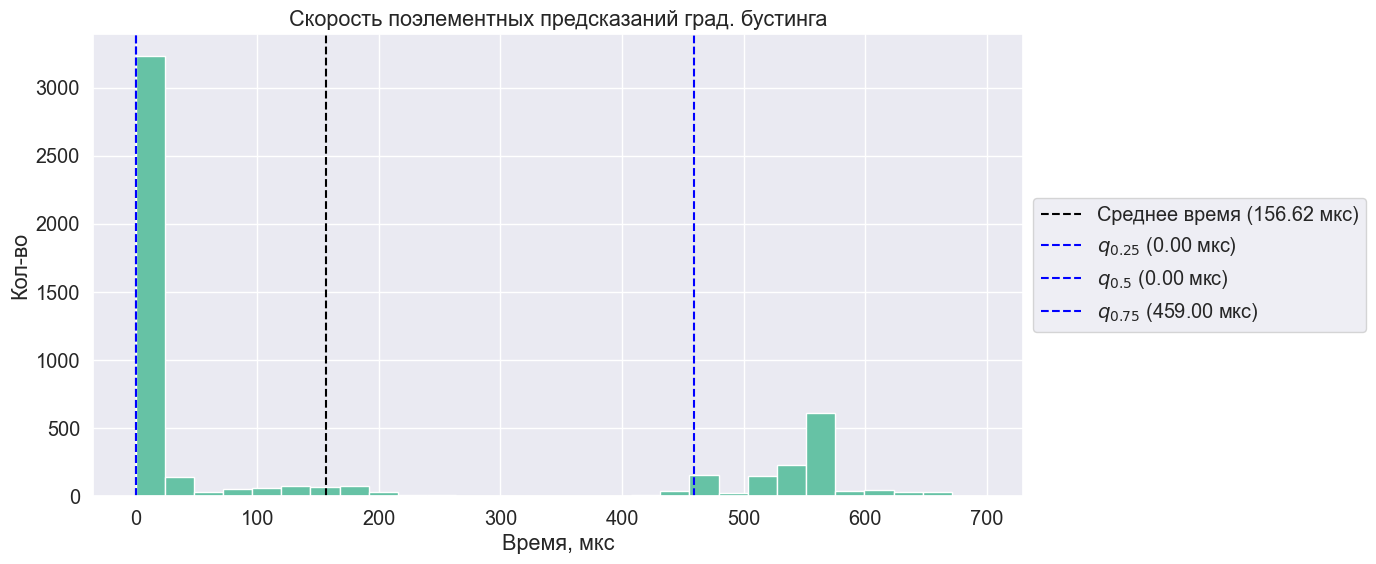

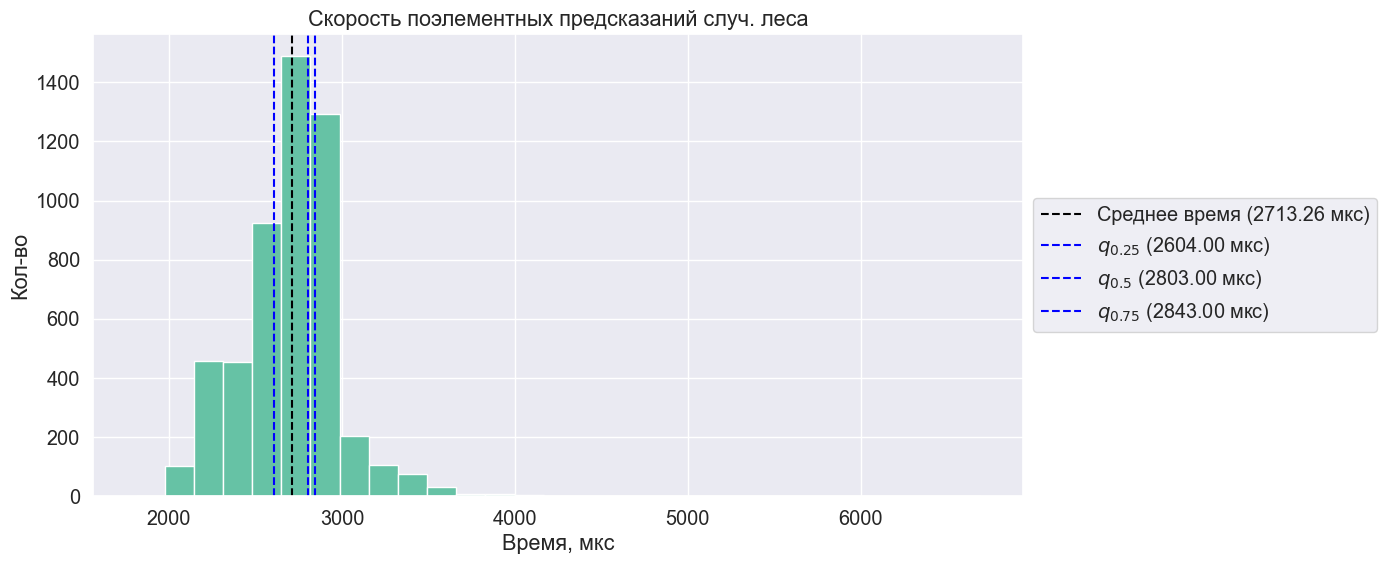

In [50]:
for model, name in zip([gb,rf], ['град. бустинга','случ. леса']):
    plt.figure(figsize=(12,6))
    times = []
    for elem in X_test:
        start = datetime.datetime.now()
        for _ in range(30):
            model.predict([elem])
        stop = datetime.datetime.now()
        times.append(((stop-start)/30).microseconds)
    times = np.array(times)
    plt.hist(times, bins=np.linspace(times.min(), times.max(), 30))
    plt.axvline(x=times.mean(), ls='--', color='black', label=f'Среднее время ({times.mean():.2f} мкс)')
    for q in [0.25,0.5,0.75]:
        plt.axvline(x=np.quantile(times, q), ls='--', color='blue', label=f'$q_\u007b{q}\u007d$ ({np.quantile(times, q):.2f} мкс)')
    plt.title(f'Скорость поэлементных предсказаний {name}')
    plt.xlabel('Время, мкс')
    plt.ylabel('Кол-во')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

*В среднем, предикт случайного леса происходит тоже дольше*

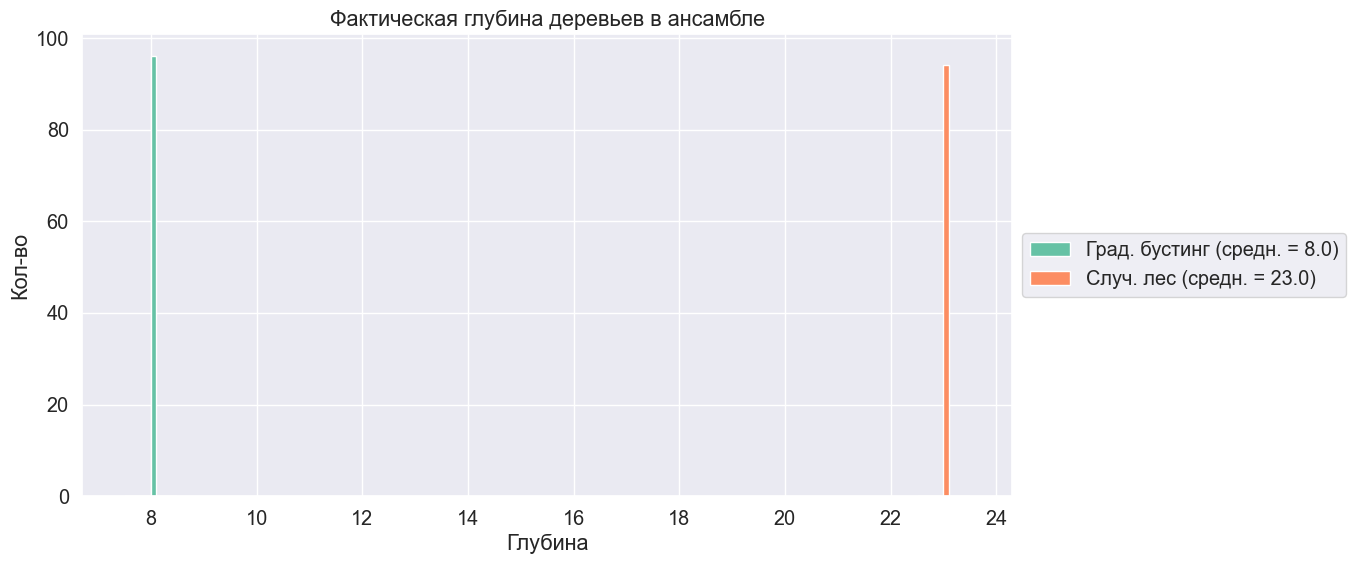

In [32]:
plt.figure(figsize=(12,6))
gb_depth, rf_depth = np.array([t[0].get_depth() for t in gb.estimators_]), np.array([t.get_depth() for t in rf.estimators_])
plt.hist(gb_depth, label=f'Град. бустинг (средн. = {gb_depth.mean().round(1)})')
plt.hist(rf_depth, label=f'Случ. лес (средн. = {rf_depth.mean().round(1)})')
plt.title(f'Фактическая глубина деревьев в ансамбле')
plt.xlabel('Глубина')
plt.ylabel('Кол-во')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

*Как и стоило ожидать, в случайном лесу деревья глубокие, а в бустинге - короткие*

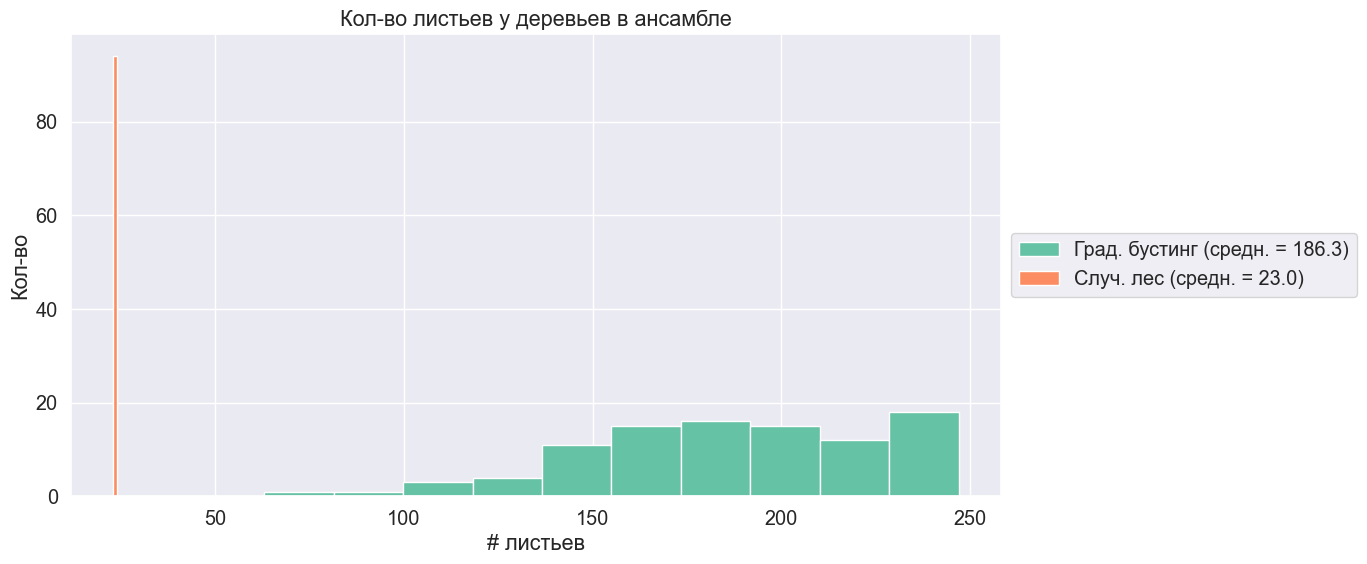

In [38]:
plt.figure(figsize=(12,6))
gb_n_leaves, rf_n_leaves = np.array([t[0].get_n_leaves() for t in gb.estimators_]), np.array([t.get_depth() for t in rf.estimators_])
plt.hist(gb_n_leaves, label=f'Град. бустинг (средн. = {gb_n_leaves.mean().round(1)})')
plt.hist(rf_n_leaves, label=f'Случ. лес (средн. = {rf_n_leaves.mean().round(1)})', bins=[rf_n_leaves[0],rf_n_leaves[0]+1])  # все получились одинаковые, так график нагляднее
plt.title(f'Кол-во листьев у деревьев в ансамбле')
plt.xlabel('# листьев')
plt.ylabel('Кол-во')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

*В среднем в деревьях случайного леса меньше листьев (и разброс кол-ва листьев тоже меньше)*

**3.** 

Выберите самый значимый признак согласно `feature_importances_`. Визуализируйте работу бустинга, обученного только на одном этом признаке.

Для этого рассмотрите процесс построения бустинга для первых 10 итераций. При визуализации требуется для каждой итерации нарисовать:
* предсказания новой базовой модели и выборку, на которой эта базовая модель обучается;
* предсказания текущей композиции и исходную обучающую выборку. 

Пример графиков смотрите в лекции в разделе бустинг в задаче регресии.

In [40]:
print(gb.feature_importances_)
feat = np.argmax(gb.feature_importances_)

[0.53230451 0.04617508 0.0341952  0.01965395 0.02206649 0.13301233
 0.10508123 0.10751121]


Как получается выборка, на которой обучается новая базовая модель в данном случае и в общем случае? 

**4.**

Параметр `init` у класса `GradientBoostingRegressor` задает модель, выполняющую начальные предсказания, с которых стартует построение ансамбля. Какая начальная модель используется по умолчанию?

*Согласно документации sklearn, по умолчанию используется DummyEstimator, для mse-лосса выдающий среднее по таргетам*

Обучите градиентный бустинг на решающих деревьях, у которого в качестве инициализирующей модели используется линейная регрессия. Для этого в качестве параметра `init` передайте модель ридж-регрессии `Ridge`, которая должна быть инициализирована, но необучена. 

Подберите оптимальные гиперпараметры такой композиции. Как вы будете подбирать гиперпараметр ридж-регрессии? Улучшилось ли качество модели на тестовой выборке?

*Замечания.* 

1. Для настройки `alpha` в `Ridge`-модели внутри `GradientBoostingRegressor` вам может помочь метод `get_params()` у бустинга.
2. Не забывайте, что у бустинга тоже есть параметр `alpha`, не перепутайте их.

In [ ]:
gridsearch = GridSearchCV(
    GradientBoostingRegressor(init=Ridge(), random_state=42), 
    param_grid = {
        'init__alpha': [0.1, 1.0],  # альфа для Ridge
        'n_estimators': np.arange(80,101,5),
        'max_depth': np.arange(5,14,2)
    }, 
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42), 
    scoring='neg_mean_squared_error'
).fit(X_train, y_train)

In [53]:
print("Лучшие гиперпараметры:")
for k,v in gridsearch.best_params_.items():
    print(f'{k}: {v}')

gb = GradientBoostingRegressor(
    init=Ridge(alpha=gridsearch.best_params_['init__alpha']), 
    random_state=42, 
    n_estimators=gridsearch.best_params_['n_estimators'],
    max_depth=gridsearch.best_params_['max_depth']
).fit(X_train, y_train)
print(f'MSE на тесте: {MSE(y_test, gb.predict(X_test)):.2f}')

Лучшие гиперпараметры:
init__alpha: 1.0
max_depth: 9
n_estimators: 100
MSE на тесте: 0.24


*Качество на тесте немного упало. Это подчеркивает важность правильной инициализации моделей*

**5.** 

Рассмотрим модели смеси градиентного бустинга $\widehat{y}_{gb}$ и случайного леса $\widehat{y}_{rf}$ с оптимальными гиперпараметрами, подобранными ранее, в виде
$$\widehat{y}(x) = w \widehat{y}_{gb}(x) +  (1-w) \widehat{y}_{rf}(x),$$
где $w \in [0, 1]$ &mdash; коэффициент усреднения. Подберите оптимальное значение гиперпараметра $w$ и выведите его. Удалось ли добиться улучшения качества на тестовой выборке?

**6.**

Сделайте итоговые выводы.

*В этой задаче удалось ближе познакомиться с градиентным бустингом на деревьях и сравнить его с другим изученным ансамблевым подходом - случайным лесом (бэггингом на деревьях). Удалось выявить влияние различных параметров на работу метода. Выяснилось, что в ряде случаев бустинг обучается и работает быстрее, чем случайный лес, причем показывает лучшее качество. Это дает некоторое представление о том, почему градиентный бустинг на деревьях часто применяют на практике*